<a href="https://colab.research.google.com/github/abrham17/SHAP/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {acc_log}')

Logistic Regression Accuracy: 1.0


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {acc_rf}')

Random Forest Accuracy: 1.0


In [ ]:
explainer_log = shap.Explainer(logreg, X_train)
shap_values_log = explainer_log(X_test)
shap_log_mean = np.mean(np.abs(shap_values_log.values), axis=0).mean(axis=1)

In [ ]:
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf(X_test)
shap_rf_mean = np.mean(np.abs(shap_values_rf.values), axis=0).mean(axis=1)

In [ ]:
features = iris.feature_names
print('Feature Names:', features)
importance_df = pd.DataFrame({
    'Feature': features,
    'LogReg_SHAP': shap_log_mean,
    'RF_SHAP': shap_rf_mean
})
print('\nFeature Importance Comparison:')
print(importance_df)


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Feature Importance Comparison:
             Feature  LogReg_SHAP   RF_SHAP
0  sepal length (cm)     0.238715  0.035753
1   sepal width (cm)     0.190279  0.007791
2  petal length (cm)     2.853391  0.199841
3   petal width (cm)     0.842766  0.197118


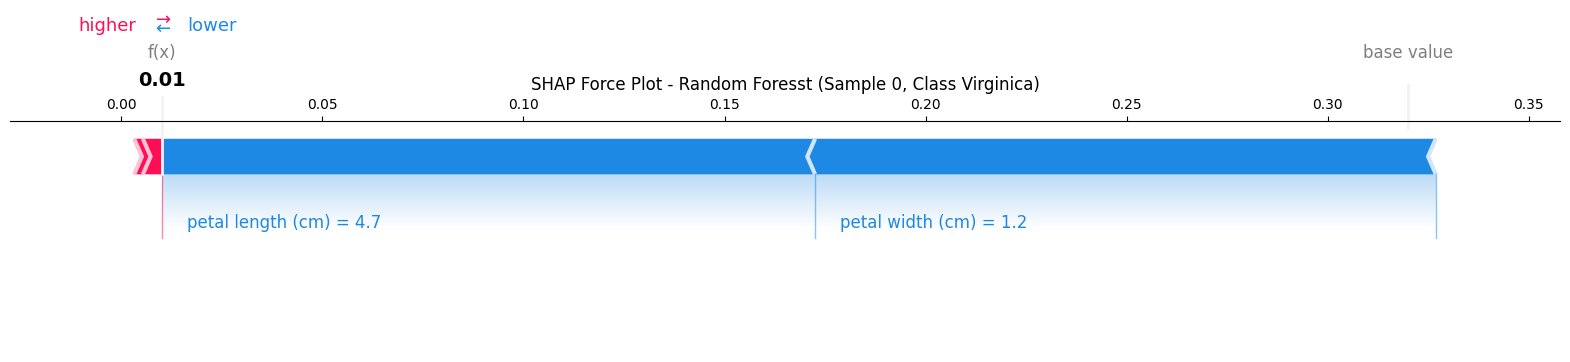

In [ ]:
# Shows feature contributions for predicting class 2 (virginica) for the first test sample
shap.initjs()
shap.force_plot(explainer_rf.expected_value[2], shap_values_rf.values[0, :, 2],
                X_test.iloc[0], feature_names=iris.feature_names, matplotlib=True, show=False)
plt.title('SHAP Force Plot - Random Foresst (Sample 0, Class Virginica)')
plt.show()


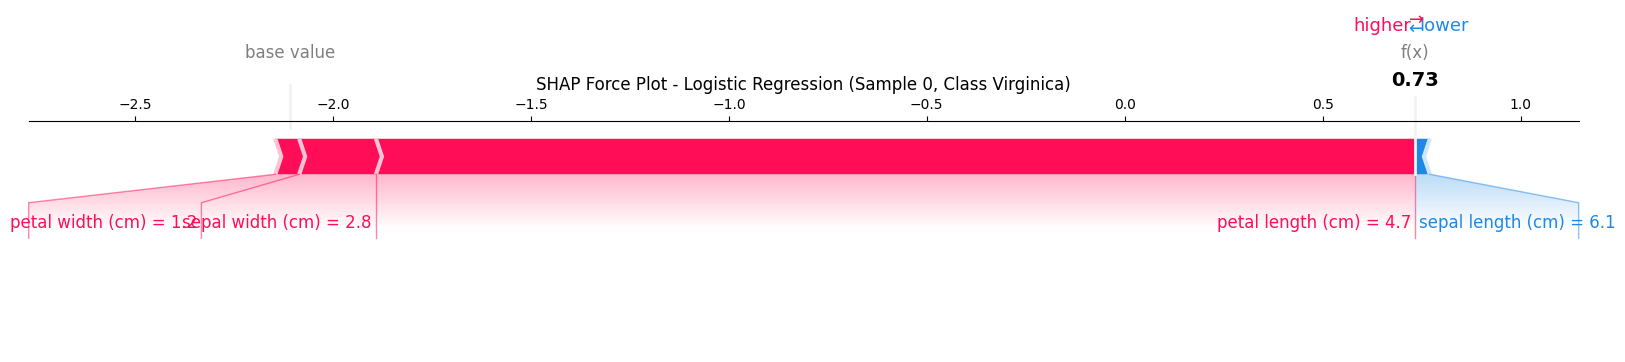

In [ ]:
# Shows feature contributions for predicting class 2 (virginica) for the first test sample
shap.initjs()
shap.force_plot(explainer_log.expected_value[2], shap_values_log.values[0, :, 2],
                X_test.iloc[0], feature_names=iris.feature_names, matplotlib=True, show=False)
plt.title('SHAP Force Plot - Logistic Regression (Sample 0, Class Virginica)')
plt.show()


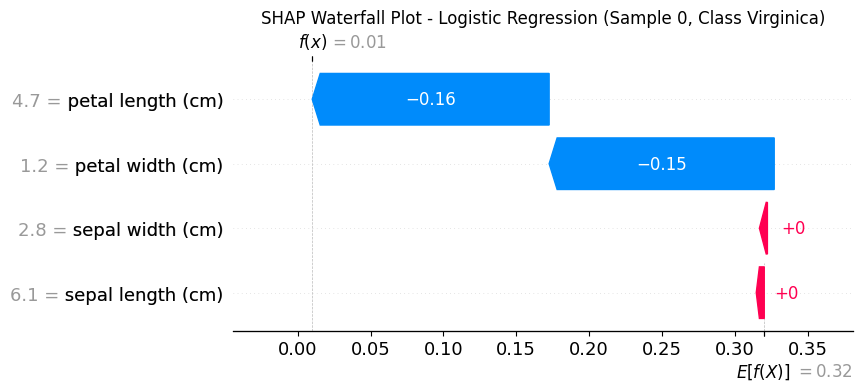

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values_rf.values[0, :, 2],
                                    base_values=explainer_rf.expected_value[2],
                                    data=X_test.iloc[0],
                                    feature_names=iris.feature_names), show=False)
plt.title('SHAP Waterfall Plot - Logistic Regression (Sample 0, Class Virginica)')
plt.show()


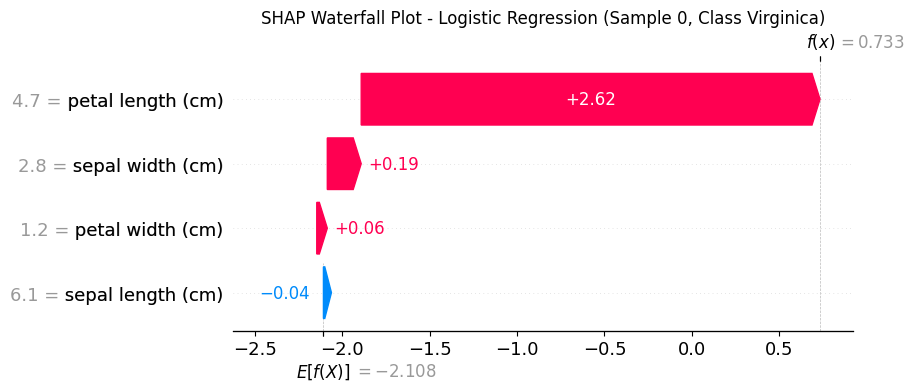

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values_log.values[0, :, 2],
                                    base_values=explainer_log.expected_value[2],
                                    data=X_test.iloc[0],
                                    feature_names=iris.feature_names), show=False)
plt.title('SHAP Waterfall Plot - Logistic Regression (Sample 0, Class Virginica)')
plt.show()
